In [1]:
raw_data <- read.csv("SSL_RAT_FULL.csv", sep=",", header=T, strip.white = T, na.strings = c("NA","NaN","","?"))
#Converting the "." in column names to "_"
names(raw_data)<-gsub("\\.", "_", names(raw_data))
cat("The Number of Rows in Initial Data is", nrow(raw_data))

The Number of Rows in Initial Data is 290208

In [2]:
final_features<-raw_data[,c('SSL_SCORE','SSL_SCORE_Rank','PREDICTOR_RAT_AGE_AT_LATEST_ARREST','PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS',
                            'PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT','PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES','PREDICTOR_RAT_GANG_AFFILIATION', 
                           'PREDICTOR_RAT_NARCOTIC_ARRESTS','PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY','PREDICTOR_RAT_UUW_ARRESTS','RACE_CODE_CD')]

In [3]:
complete_data <- final_features[complete.cases(final_features),]
nrow(complete_data)

[1] 290123

In [4]:
head(complete_data)

SSL_SCORE,SSL_SCORE_Rank,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD
500,1,20-30,0,1,4,1,1,1.0,1,0
500,1,less than 20,1,2,2,1,7,0.2,1,0
500,1,20-30,4,3,0,1,0,-1.1,0,1
500,1,less than 20,1,2,6,0,0,0.0,0,0
500,1,less than 20,1,1,4,1,1,-0.3,2,0
500,1,less than 20,1,2,6,1,0,-0.4,1,0


In [5]:
library(MatchIt)
library(dplyr)
library(ggplot2)

Warning message:
"package 'MatchIt' was built under R version 3.3.3"Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'ggplot2' was built under R version 3.3.3"

In [6]:
complete_data %>%
  group_by(RACE_CODE_CD) %>%
  summarise(NUMBER_OF_PEOPLE = n(),
            MEAN_SSL_SCORE = mean(SSL_SCORE),
            STD_ERROR = sd(SSL_SCORE) / sqrt(NUMBER_OF_PEOPLE))

RACE_CODE_CD,NUMBER_OF_PEOPLE,MEAN_SSL_SCORE,STD_ERROR
0,207800,282.4735,0.1348997
1,82323,269.8436,0.1968091


In [7]:
mod_match <- matchit(RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + 
            PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY +
            PREDICTOR_RAT_UUW_ARRESTS,
                     method = "nearest", data = complete_data)

In [8]:
mod_match


Call: 
matchit(formula = RACE_CODE_CD ~ PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS + 
    PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT + PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES + 
    PREDICTOR_RAT_GANG_AFFILIATION + PREDICTOR_RAT_NARCOTIC_ARRESTS + 
    PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY + PREDICTOR_RAT_UUW_ARRESTS, 
    data = complete_data, method = "nearest")

Sample sizes:
          Control Treated
All        207800   82323
Matched     82323   82323
Unmatched  125477       0
Discarded       0       0


In [9]:
matched <- match.data(mod_match)
matched_copy<-matched

[1] "To identify the units, use first mouse button; to stop, use second."


integer(0)

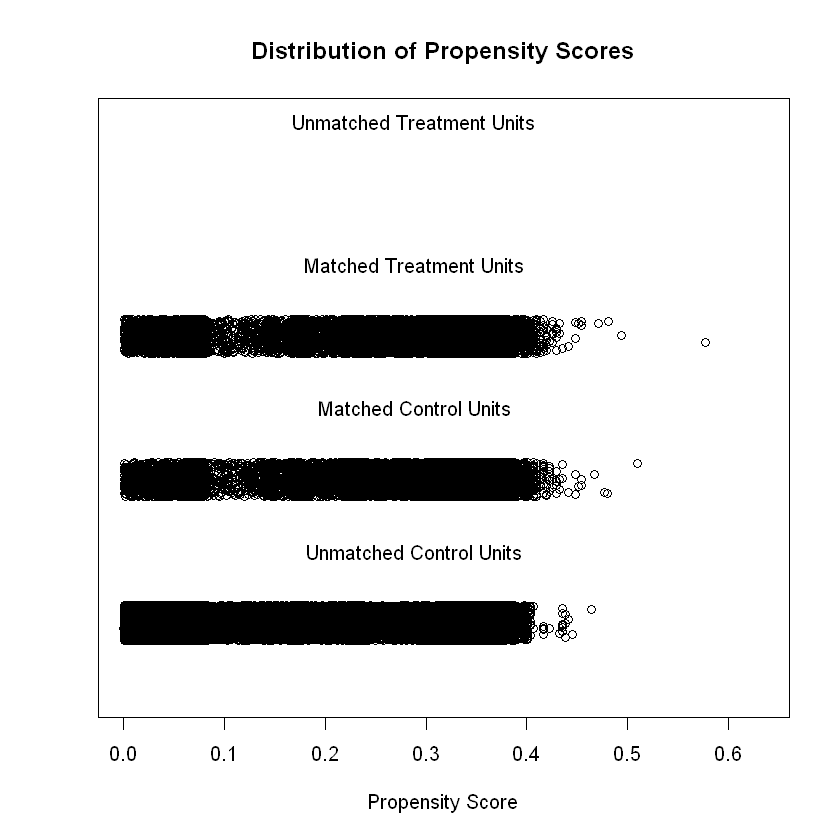

In [10]:
plot(mod_match, type = "jitter")

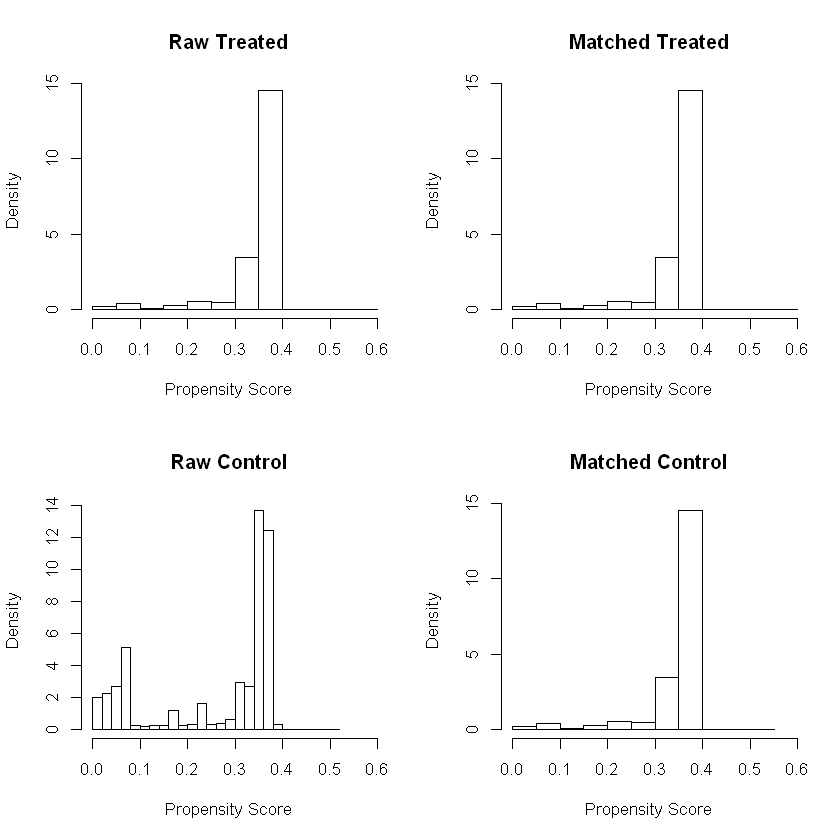

In [11]:
plot(mod_match, type = "hist")

In [12]:
head(matched)

,SSL_SCORE,SSL_SCORE_Rank,PREDICTOR_RAT_AGE_AT_LATEST_ARREST,PREDICTOR_RAT_VICTIM_SHOOTING_INCIDENTS,PREDICTOR_RAT_VICTIM_BATTERY_OR_ASSAULT,PREDICTOR_RAT_ARRESTS_VIOLENT_OFFENSES,PREDICTOR_RAT_GANG_AFFILIATION,PREDICTOR_RAT_NARCOTIC_ARRESTS,PREDICTOR_RAT_TREND_IN_CRIMINAL_ACTIVITY,PREDICTOR_RAT_UUW_ARRESTS,RACE_CODE_CD,distance,weights
3,500,1,20-30,4,3,0,1,0,-1.1,0,1,1.269889e-05,1
17,500,1,less than 20,2,2,1,1,5,-1.7,0,0,1.176922e-04,1
21,500,1,less than 20,0,0,0,1,10,2.5,0,0,1.933736e-02,1
24,500,1,less than 20,0,1,12,1,0,0.4,1,1,1.068423e-05,1
66,500,1,less than 20,0,0,0,0,8,0.6,0,0,1.337338e-01,1
72,500,1,less than 20,4,4,0,1,2,-1.5,0,0,3.146434e-06,1


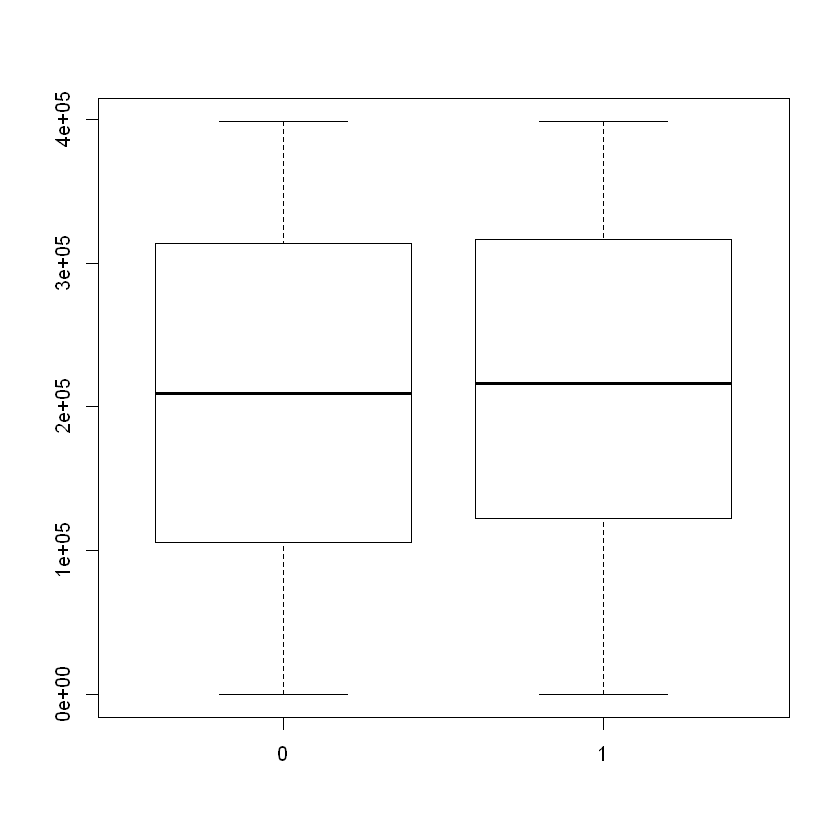

In [13]:
# Doing T - test on matched records
options(warn=-1)

attach(matched)
boxplot(SSL_SCORE_Rank~RACE_CODE_CD)

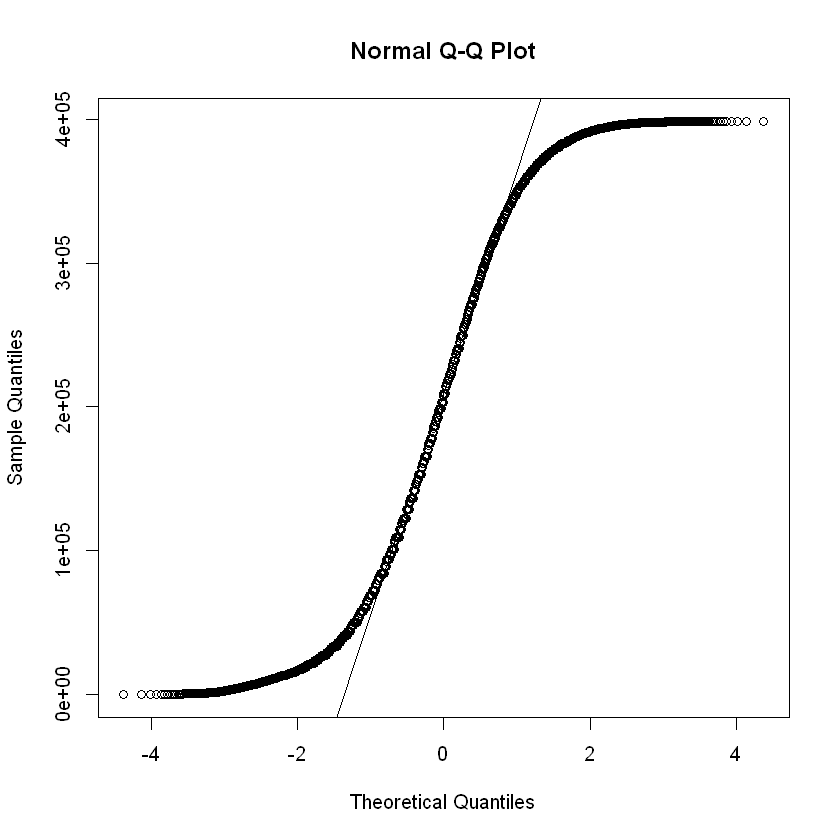

In [14]:
race_black <-subset(matched,RACE_CODE_CD == 0)
race_white<-subset(matched,RACE_CODE_CD == 1)
# Normal QQ Plot for RACE == BLACK
qqnorm(race_black$SSL_SCORE_Rank)
qqline(race_black$SSL_SCORE_Rank)

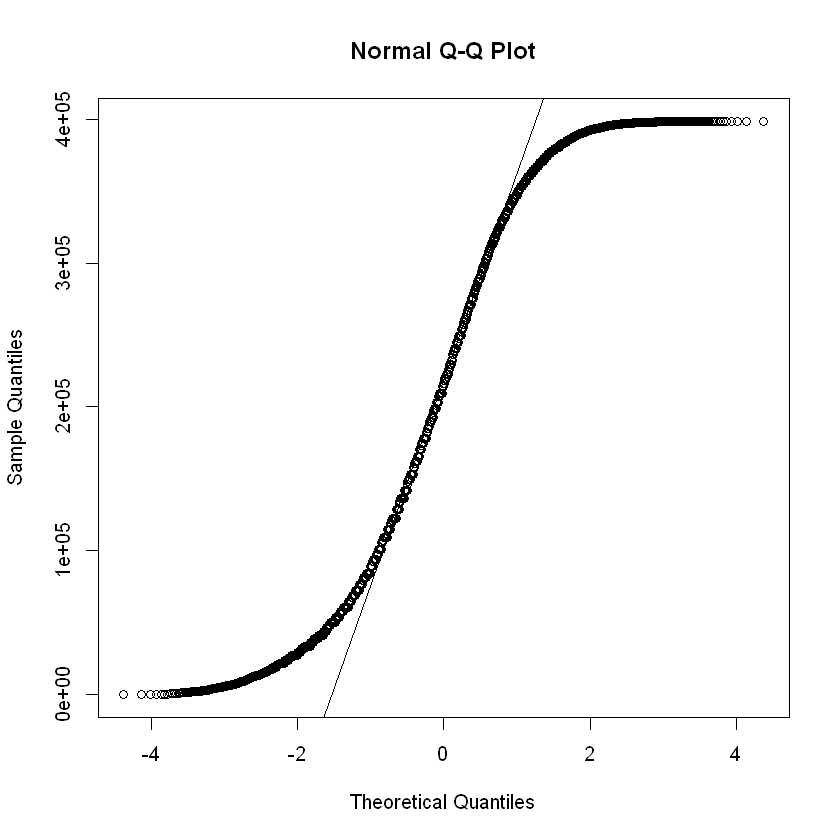

In [15]:
# Normal QQ Plot for RACE == WHITE
qqnorm(race_white$SSL_SCORE_Rank)
qqline(race_white$SSL_SCORE_Rank)

In [16]:
t.test(SSL_SCORE_Rank~RACE_CODE_CD)


	Welch Two Sample t-test

data:  SSL_SCORE_Rank by RACE_CODE_CD
t = -15.691, df = 163970, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -9885.336 -7689.947
sample estimates:
mean in group 0 mean in group 1 
       208055.6        216843.3 
